<a href="https://colab.research.google.com/github/cpetridis/pytorch-projects/blob/main/classification/multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Putting all together with a multi-class classification problem

* Problems will be like : dogs VS cats VS chicken

[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]]
[3 2 2 1 1]


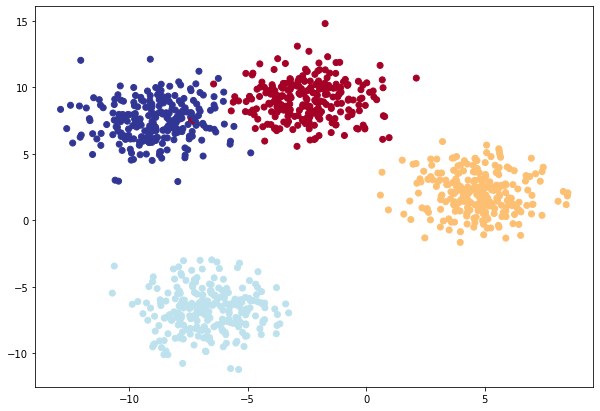

In [94]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#Let's create our multi-class dataset
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

print(X_blob[:5])
print(y_blob[:5])

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


In [95]:
 class BlobModel(nn.Module):
   def __init__(self, input_features, output_features, hidden_units=8):
     super().__init__()
     self.linear_layer_stack = nn.Sequential(
         nn.Linear(in_features=input_features, out_features=hidden_units),
        #  nn.ReLU(),
         nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #  nn.ReLU(),
         nn.Linear(in_features=hidden_units, out_features=output_features)
    )
   def forward(self, x):
    return self.linear_layer_stack(x)

In [96]:
#Let's create an instance of out model

my_model = BlobModel(input_features=2, output_features=4, hidden_units=8)

In [97]:
my_model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [98]:
#Setting up both a loss function and an optimizer 

loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=my_model.parameters(), lr = 0.1)

In [99]:
my_model.eval()
with torch.inference_mode():
  y_logits = my_model(X_blob_test)

y_pred_probs = torch.softmax(y_logits, dim=1)

print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [100]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [101]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [102]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100

  return acc

In [103]:
y_blob_train.dtype

torch.int64

In [104]:
#Create both training and testing loop for out multi-class model

torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
  my_model.train()
  y_logits = my_model(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fun(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  my_model.eval()
  with torch.inference_mode():
    test_logits = my_model(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fun(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)
  if epoch%10 == 0:
    print(f"Epoch: {epoch} ---- Loss: {loss:.4f} ---- Accuracy: {acc:.2f}% ---- Test loss: {test_loss:.4f}, Test_acc: {test_acc:.2f}%" )


Epoch: 0 ---- Loss: 1.0432 ---- Accuracy: 65.50% ---- Test loss: 0.5786, Test_acc: 95.50%
Epoch: 10 ---- Loss: 0.1440 ---- Accuracy: 99.12% ---- Test loss: 0.1304, Test_acc: 99.00%
Epoch: 20 ---- Loss: 0.0806 ---- Accuracy: 99.12% ---- Test loss: 0.0722, Test_acc: 99.50%
Epoch: 30 ---- Loss: 0.0592 ---- Accuracy: 99.12% ---- Test loss: 0.0513, Test_acc: 99.50%
Epoch: 40 ---- Loss: 0.0489 ---- Accuracy: 99.00% ---- Test loss: 0.0410, Test_acc: 99.50%
Epoch: 50 ---- Loss: 0.0429 ---- Accuracy: 99.00% ---- Test loss: 0.0349, Test_acc: 99.50%
Epoch: 60 ---- Loss: 0.0391 ---- Accuracy: 99.00% ---- Test loss: 0.0308, Test_acc: 99.50%
Epoch: 70 ---- Loss: 0.0364 ---- Accuracy: 99.00% ---- Test loss: 0.0280, Test_acc: 99.50%
Epoch: 80 ---- Loss: 0.0345 ---- Accuracy: 99.00% ---- Test loss: 0.0259, Test_acc: 99.50%
Epoch: 90 ---- Loss: 0.0330 ---- Accuracy: 99.12% ---- Test loss: 0.0242, Test_acc: 99.50%


helper_functions.py already exists. No need for downloading


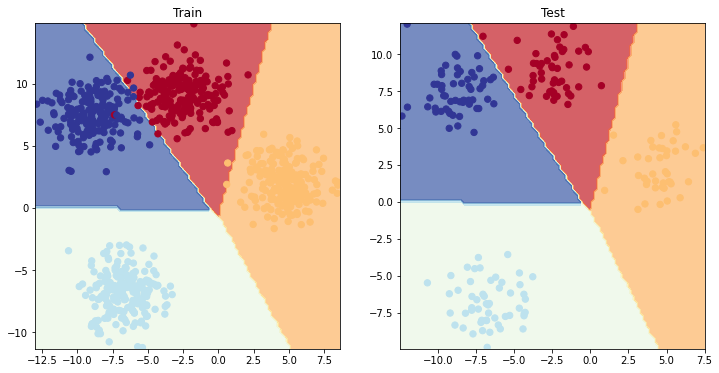

In [106]:
import requests
from pathlib import Path

FILE_NAME = "helper_functions.py"
if Path(FILE_NAME).is_file():
  print(f"{FILE_NAME} already exists. No need for downloading")
else:
  print(f"Downloading {FILE_NAME}.py ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open(FILE_NAME, "wb") as fd:
    fd.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(my_model, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(my_model, X_blob_test, test_pred)